In [198]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import eigs

## Functions for use in AIMD

In [199]:
def add(current_cwnd, alpha):
    return current_cwnd + alpha

def exp(current_cwnd, alpha, power=1.5):
    return current_cwnd + (alpha * (current_cwnd ** power))

def log(current_cwnd, alpha):
    return current_cwnd + (alpha * np.log(current_cwnd + 1))

def inverse(current_cwnd, alpha):
    return current_cwnd + (alpha * 20/(current_cwnd+1))

def mul(current_cwnd, beta):
    return current_cwnd * beta

# Conventional AIMD (alpha=1, beta=0.5)

## Variable initialisations

In [200]:
# Number of AIMD iterations to simulate
MAX_ITERATIONS = 100

# Maximum capacity of the bottleneck shared by all users
MAX_CAPACITY = 10

# AIMD parameters for User 1
cwnd1 = 2
alpha1 = 1
beta1 = 0.5
increase_fn1 = add
decrease_fn1 = mul

# AIMD parameters for User 2
cwnd2 = 5
alpha2 = 1
beta2 = 0.5
increase_fn2 = add
decrease_fn2 = mul

# AIMD parameters for User 3
# cwnd3 = 3
# alpha3 = 1
# beta3 = 0.5
# increase_fn3 = add
# decrease_fn3 = mul

alphas = [alpha1, alpha2]
betas = [beta1, beta2]

# Store useful information at each iteration
step = []
cwnd1_values = np.zeros(MAX_ITERATIONS + 1)
cwnd2_values = np.zeros(MAX_ITERATIONS + 1)
# cwnd3_values = np.zeros(MAX_ITERATIONS + 1)

##  Perron-Frobenius right eigenvector of matrix A
<!-- ![title](MatrixA.png) -->
<img src="MatrixA.png" align="left" width=240 height=240 />

In [201]:
a = np.diag(betas) + \
(1/sum(alphas)) * \
np.array(alphas).reshape(-1,1) * \
np.array(list(map(lambda beta:1-beta, betas)))

In [202]:
eigenvalues, eigenvectors = np.linalg.eig(a)
pf_eigenvector = eigenvectors[:, np.argmax(eigenvalues)]
print(pf_eigenvector)

[0.70710678 0.70710678]


## AIMD iteration simulation

In [203]:
for i in range(MAX_ITERATIONS):
    cwnd1_values[i] = cwnd1
    cwnd2_values[i] = cwnd2
#     cwnd3_values[i] = cwnd3
    if (cwnd1 + cwnd2 <= MAX_CAPACITY):
        step.append('I')
        cwnd1 = increase_fn1(cwnd1, alpha=alpha1)
        cwnd2 = increase_fn2(cwnd2, alpha=alpha2)
#         cwnd3 = increase_fn3(cwnd3, alpha=alpha3)
    else:
        step.append('D')
        cwnd1 = decrease_fn1(cwnd1, beta=beta1)
        cwnd2 = decrease_fn2(cwnd2, beta=beta2)
#         cwnd3 = decrease_fn3(cwnd3, beta=beta3)
        
# Store values in arrays
cwnd1_values[-1] = cwnd1
cwnd2_values[-1] = cwnd2
# cwnd3_values[-1] = cwnd3
    
# Display the procedure taken in each iteration
print(f"{MAX_ITERATIONS} iterations completed:", step)

# Display the final values
print("Last 5 values of cwnd1:", cwnd1_values[-5:])
print("Last 5 values of cwnd2:", cwnd2_values[-5:])
# print("Last 5 values of cwnd3:", cwnd3_values[-5:])

100 iterations completed: ['I', 'I', 'D', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'D', 'I']
Last 5 values of cwnd1: [3.99999988 4.99999988 5.99999988 2.99999994 3.99999994]
Last 5 values of cwnd2: [4.00000006 5.00000006 6.00000006 3.00000003 4.00000003]


## Data visualisation

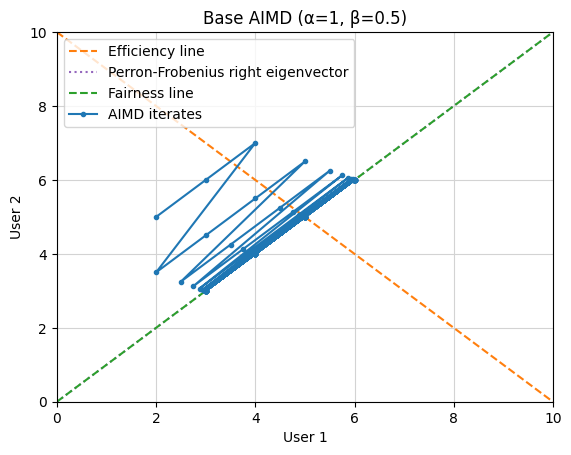

In [204]:
plt.plot(range(MAX_CAPACITY+1), range(MAX_CAPACITY,-1,-1), color='tab:orange', linestyle='--', label='Efficiency line')
plt.axline([0,0], pf_eigenvector, color='tab:purple', linestyle=':', label='Perron-Frobenius right eigenvector')
plt.plot(range(MAX_CAPACITY+1), range(MAX_CAPACITY+1), color='tab:green', linestyle='--', label='Fairness line')
plt.plot(cwnd1_values, cwnd2_values, marker='.', color='tab:blue', label='AIMD iterates')


plt.ylim([0,MAX_CAPACITY])
plt.xlim([0,MAX_CAPACITY])
plt.xlabel('User 1')
plt.ylabel('User 2')
plt.grid(color='lightgrey')
plt.legend()
plt.title(f'Base AIMD (α=1, β=0.5)')
plt.show()

# Linear AIMD (alpha=0.5, beta=0.5)

## Variable initialisations

In [205]:
# Number of AIMD iterations to simulate
MAX_ITERATIONS = 100

# Maximum capacity of the bottleneck shared by all users
MAX_CAPACITY = 10

# AIMD parameters for User 1
cwnd1 = 2
alpha1 = 0.5
beta1 = 0.5
increase_fn1 = add
decrease_fn1 = mul

# AIMD parameters for User 2
cwnd2 = 5
alpha2 = 0.5
beta2 = 0.5
increase_fn2 = add
decrease_fn2 = mul

# AIMD parameters for User 3
# cwnd3 = 3
# alpha3 = 1
# beta3 = 0.5
# increase_fn3 = add
# decrease_fn3 = mul

alphas = [alpha1, alpha2]
betas = [beta1, beta2]

# Store useful information at each iteration
step = []
cwnd1_values = np.zeros(MAX_ITERATIONS + 1)
cwnd2_values = np.zeros(MAX_ITERATIONS + 1)
# cwnd3_values = np.zeros(MAX_ITERATIONS + 1)

##  Perron-Frobenius right eigenvector of matrix A
<!-- ![title](MatrixA.png) -->
<img src="MatrixA.png" align="left" width=240 height=240 />

In [206]:
a = np.diag(betas) + \
(1/sum(alphas)) * \
np.array(alphas).reshape(-1,1) * \
np.array(list(map(lambda beta:1-beta, betas)))

In [207]:
eigenvalues, eigenvectors = np.linalg.eig(a)
pf_eigenvector = eigenvectors[:, np.argmax(eigenvalues)]
print(pf_eigenvector)

[0.70710678 0.70710678]


## AIMD iteration simulation

In [208]:
for i in range(MAX_ITERATIONS):
    cwnd1_values[i] = cwnd1
    cwnd2_values[i] = cwnd2
#     cwnd3_values[i] = cwnd3
    if (cwnd1 + cwnd2 <= MAX_CAPACITY):
        step.append('I')
        cwnd1 = increase_fn1(cwnd1, alpha=alpha1)
        cwnd2 = increase_fn2(cwnd2, alpha=alpha2)
#         cwnd3 = increase_fn3(cwnd3, alpha=alpha3)
    else:
        step.append('D')
        cwnd1 = decrease_fn1(cwnd1, beta=beta1)
        cwnd2 = decrease_fn2(cwnd2, beta=beta2)
#         cwnd3 = decrease_fn3(cwnd3, beta=beta3)
        
# Store values in arrays
cwnd1_values[-1] = cwnd1
cwnd2_values[-1] = cwnd2
# cwnd3_values[-1] = cwnd3
    
# Display the procedure taken in each iteration
print(f"{MAX_ITERATIONS} iterations completed:", step)

# Display the final values
print("Last 5 values of cwnd1:", cwnd1_values[-5:])
print("Last 5 values of cwnd2:", cwnd2_values[-5:])
# print("Last 5 values of cwnd3:", cwnd3_values[-5:])

100 iterations completed: ['I', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'I', 'I']
Last 5 values of cwnd1: [2.99998474 3.49998474 3.99998474 4.49998474 4.99998474]
Last 5 values of cwnd2: [3.00003052 3.50003052 4.00003052 4.50003052 5.00003052]


## Data visualisation

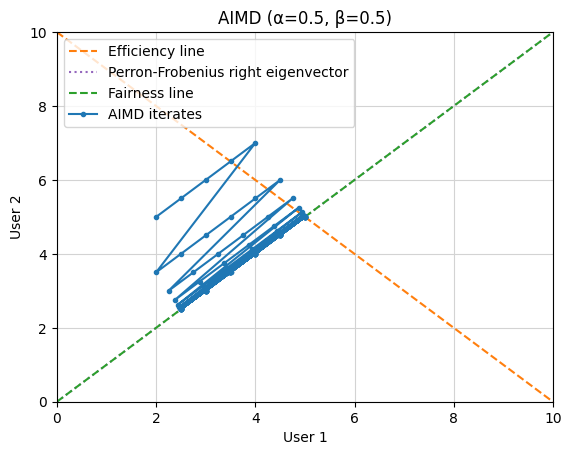

In [209]:
plt.plot(range(MAX_CAPACITY+1), range(MAX_CAPACITY,-1,-1), color='tab:orange', linestyle='--', label='Efficiency line')
plt.axline([0,0], pf_eigenvector, color='tab:purple', linestyle=':', label='Perron-Frobenius right eigenvector')
plt.plot(range(MAX_CAPACITY+1), range(MAX_CAPACITY+1), color='tab:green', linestyle='--', label='Fairness line')
plt.plot(cwnd1_values, cwnd2_values, marker='.', color='tab:blue', label='AIMD iterates')


plt.ylim([0,MAX_CAPACITY])
plt.xlim([0,MAX_CAPACITY])
plt.xlabel('User 1')
plt.ylabel('User 2')
plt.grid(color='lightgrey')
plt.legend()
plt.title(f'AIMD (α=0.5, β=0.5)')
plt.show()

# Linear AIMD (alpha=3, beta=0.5)

## Variable initialisations

In [210]:
# Number of AIMD iterations to simulate
MAX_ITERATIONS = 100

# Maximum capacity of the bottleneck shared by all users
MAX_CAPACITY = 10

# AIMD parameters for User 1
cwnd1 = 2
alpha1 = 3
beta1 = 0.5
increase_fn1 = add
decrease_fn1 = mul

# AIMD parameters for User 2
cwnd2 = 5
alpha2 = 3
beta2 = 0.5
increase_fn2 = add
decrease_fn2 = mul

# AIMD parameters for User 3
# cwnd3 = 3
# alpha3 = 1
# beta3 = 0.5
# increase_fn3 = add
# decrease_fn3 = mul

alphas = [alpha1, alpha2]
betas = [beta1, beta2]

# Store useful information at each iteration
step = []
cwnd1_values = np.zeros(MAX_ITERATIONS + 1)
cwnd2_values = np.zeros(MAX_ITERATIONS + 1)
# cwnd3_values = np.zeros(MAX_ITERATIONS + 1)

##  Perron-Frobenius right eigenvector of matrix A
<!-- ![title](MatrixA.png) -->
<img src="MatrixA.png" align="left" width=240 height=240 />

In [211]:
a = np.diag(betas) + \
(1/sum(alphas)) * \
np.array(alphas).reshape(-1,1) * \
np.array(list(map(lambda beta:1-beta, betas)))

In [212]:
eigenvalues, eigenvectors = np.linalg.eig(a)
pf_eigenvector = eigenvectors[:, np.argmax(eigenvalues)]
print(pf_eigenvector)

[0.70710678 0.70710678]


## AIMD iteration simulation

In [213]:
for i in range(MAX_ITERATIONS):
    cwnd1_values[i] = cwnd1
    cwnd2_values[i] = cwnd2
#     cwnd3_values[i] = cwnd3
    if (cwnd1 + cwnd2 <= MAX_CAPACITY):
        step.append('I')
        cwnd1 = increase_fn1(cwnd1, alpha=alpha1)
        cwnd2 = increase_fn2(cwnd2, alpha=alpha2)
#         cwnd3 = increase_fn3(cwnd3, alpha=alpha3)
    else:
        step.append('D')
        cwnd1 = decrease_fn1(cwnd1, beta=beta1)
        cwnd2 = decrease_fn2(cwnd2, beta=beta2)
#         cwnd3 = decrease_fn3(cwnd3, beta=beta3)
        
# Store values in arrays
cwnd1_values[-1] = cwnd1
cwnd2_values[-1] = cwnd2
# cwnd3_values[-1] = cwnd3
    
# Display the procedure taken in each iteration
print(f"{MAX_ITERATIONS} iterations completed:", step)

# Display the final values
print("Last 5 values of cwnd1:", cwnd1_values[-5:])
print("Last 5 values of cwnd2:", cwnd2_values[-5:])
# print("Last 5 values of cwnd3:", cwnd3_values[-5:])

100 iterations completed: ['I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D']
Last 5 values of cwnd1: [3. 6. 3. 6. 3.]
Last 5 values of cwnd2: [3. 6. 3. 6. 3.]


## Data visualisation

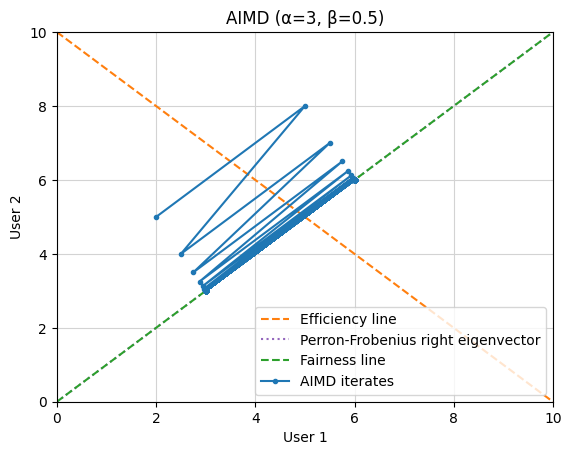

In [214]:
plt.plot(range(MAX_CAPACITY+1), range(MAX_CAPACITY,-1,-1), color='tab:orange', linestyle='--', label='Efficiency line')
plt.axline([0,0], pf_eigenvector, color='tab:purple', linestyle=':', label='Perron-Frobenius right eigenvector')
plt.plot(range(MAX_CAPACITY+1), range(MAX_CAPACITY+1), color='tab:green', linestyle='--', label='Fairness line')
plt.plot(cwnd1_values, cwnd2_values, marker='.', color='tab:blue', label='AIMD iterates')


plt.ylim([0,MAX_CAPACITY])
plt.xlim([0,MAX_CAPACITY])
plt.xlabel('User 1')
plt.ylabel('User 2')
plt.grid(color='lightgrey')
plt.legend()
plt.title(f'AIMD (α=3, β=0.5)')
plt.show()

# Linear AIMD (alpha=1, beta=0.2)

## Variable initialisations

In [215]:
# Number of AIMD iterations to simulate
MAX_ITERATIONS = 100

# Maximum capacity of the bottleneck shared by all users
MAX_CAPACITY = 10

# AIMD parameters for User 1
cwnd1 = 2
alpha1 = 1
beta1 = 0.2
increase_fn1 = add
decrease_fn1 = mul

# AIMD parameters for User 2
cwnd2 = 5
alpha2 = 1
beta2 = 0.2
increase_fn2 = add
decrease_fn2 = mul

# AIMD parameters for User 3
# cwnd3 = 3
# alpha3 = 1
# beta3 = 0.5
# increase_fn3 = add
# decrease_fn3 = mul

alphas = [alpha1, alpha2]
betas = [beta1, beta2]

# Store useful information at each iteration
step = []
cwnd1_values = np.zeros(MAX_ITERATIONS + 1)
cwnd2_values = np.zeros(MAX_ITERATIONS + 1)
# cwnd3_values = np.zeros(MAX_ITERATIONS + 1)

##  Perron-Frobenius right eigenvector of matrix A
<!-- ![title](MatrixA.png) -->
<img src="MatrixA.png" align="left" width=240 height=240 />

In [216]:
a = np.diag(betas) + \
(1/sum(alphas)) * \
np.array(alphas).reshape(-1,1) * \
np.array(list(map(lambda beta:1-beta, betas)))

In [217]:
eigenvalues, eigenvectors = np.linalg.eig(a)
pf_eigenvector = eigenvectors[:, np.argmax(eigenvalues)]
print(pf_eigenvector)

[0.70710678 0.70710678]


## AIMD iteration simulation

In [218]:
for i in range(MAX_ITERATIONS):
    cwnd1_values[i] = cwnd1
    cwnd2_values[i] = cwnd2
#     cwnd3_values[i] = cwnd3
    if (cwnd1 + cwnd2 <= MAX_CAPACITY):
        step.append('I')
        cwnd1 = increase_fn1(cwnd1, alpha=alpha1)
        cwnd2 = increase_fn2(cwnd2, alpha=alpha2)
#         cwnd3 = increase_fn3(cwnd3, alpha=alpha3)
    else:
        step.append('D')
        cwnd1 = decrease_fn1(cwnd1, beta=beta1)
        cwnd2 = decrease_fn2(cwnd2, beta=beta2)
#         cwnd3 = decrease_fn3(cwnd3, beta=beta3)
        
# Store values in arrays
cwnd1_values[-1] = cwnd1
cwnd2_values[-1] = cwnd2
# cwnd3_values[-1] = cwnd3
    
# Display the procedure taken in each iteration
print(f"{MAX_ITERATIONS} iterations completed:", step)

# Display the final values
print("Last 5 values of cwnd1:", cwnd1_values[-5:])
print("Last 5 values of cwnd2:", cwnd2_values[-5:])
# print("Last 5 values of cwnd3:", cwnd3_values[-5:])

100 iterations completed: ['I', 'I', 'D', 'I', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'I', 'D', 'I', 'I']
Last 5 values of cwnd1: [4. 5. 1. 2. 3.]
Last 5 values of cwnd2: [4. 5. 1. 2. 3.]


## Data visualisation

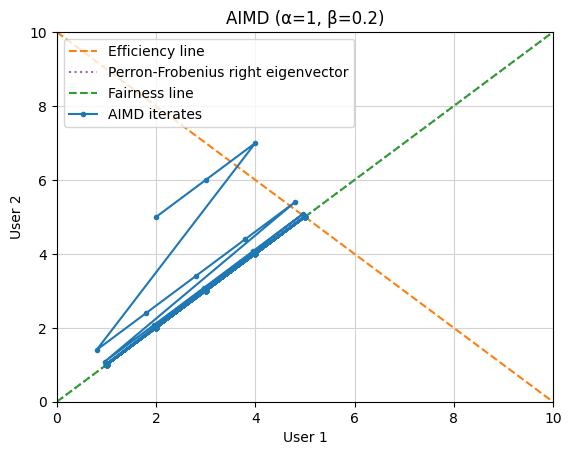

In [219]:
plt.plot(range(MAX_CAPACITY+1), range(MAX_CAPACITY,-1,-1), color='tab:orange', linestyle='--', label='Efficiency line')
plt.axline([0,0], pf_eigenvector, color='tab:purple', linestyle=':', label='Perron-Frobenius right eigenvector')
plt.plot(range(MAX_CAPACITY+1), range(MAX_CAPACITY+1), color='tab:green', linestyle='--', label='Fairness line')
plt.plot(cwnd1_values, cwnd2_values, marker='.', color='tab:blue', label='AIMD iterates')


plt.ylim([0,MAX_CAPACITY])
plt.xlim([0,MAX_CAPACITY])
plt.xlabel('User 1')
plt.ylabel('User 2')
plt.grid(color='lightgrey')
plt.legend()
plt.title(f'AIMD (α=1, β=0.2)')
plt.show()

# Linear AIMD (alpha=1, beta=0.8)

## Variable initialisations

In [220]:
# Number of AIMD iterations to simulate
MAX_ITERATIONS = 100

# Maximum capacity of the bottleneck shared by all users
MAX_CAPACITY = 10

# AIMD parameters for User 1
cwnd1 = 2
alpha1 = 1
beta1 = 0.8
increase_fn1 = add
decrease_fn1 = mul

# AIMD parameters for User 2
cwnd2 = 5
alpha2 = 1
beta2 = 0.8
increase_fn2 = add
decrease_fn2 = mul

# AIMD parameters for User 3
# cwnd3 = 3
# alpha3 = 1
# beta3 = 0.5
# increase_fn3 = add
# decrease_fn3 = mul

alphas = [alpha1, alpha2]
betas = [beta1, beta2]

# Store useful information at each iteration
step = []
cwnd1_values = np.zeros(MAX_ITERATIONS + 1)
cwnd2_values = np.zeros(MAX_ITERATIONS + 1)
# cwnd3_values = np.zeros(MAX_ITERATIONS + 1)

##  Perron-Frobenius right eigenvector of matrix A
<!-- ![title](MatrixA.png) -->
<img src="MatrixA.png" align="left" width=240 height=240 />

In [221]:
a = np.diag(betas) + \
(1/sum(alphas)) * \
np.array(alphas).reshape(-1,1) * \
np.array(list(map(lambda beta:1-beta, betas)))

In [222]:
eigenvalues, eigenvectors = np.linalg.eig(a)
pf_eigenvector = eigenvectors[:, np.argmax(eigenvalues)]
print(pf_eigenvector)

[0.70710678 0.70710678]


## AIMD iteration simulation

In [223]:
for i in range(MAX_ITERATIONS):
    cwnd1_values[i] = cwnd1
    cwnd2_values[i] = cwnd2
#     cwnd3_values[i] = cwnd3
    if (cwnd1 + cwnd2 <= MAX_CAPACITY):
        step.append('I')
        cwnd1 = increase_fn1(cwnd1, alpha=alpha1)
        cwnd2 = increase_fn2(cwnd2, alpha=alpha2)
#         cwnd3 = increase_fn3(cwnd3, alpha=alpha3)
    else:
        step.append('D')
        cwnd1 = decrease_fn1(cwnd1, beta=beta1)
        cwnd2 = decrease_fn2(cwnd2, beta=beta2)
#         cwnd3 = decrease_fn3(cwnd3, beta=beta3)
        
# Store values in arrays
cwnd1_values[-1] = cwnd1
cwnd2_values[-1] = cwnd2
# cwnd3_values[-1] = cwnd3
    
# Display the procedure taken in each iteration
print(f"{MAX_ITERATIONS} iterations completed:", step)

# Display the final values
print("Last 5 values of cwnd1:", cwnd1_values[-5:])
print("Last 5 values of cwnd2:", cwnd2_values[-5:])
# print("Last 5 values of cwnd3:", cwnd3_values[-5:])

100 iterations completed: ['I', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'I']
Last 5 values of cwnd1: [4.99997212 3.9999777  4.9999777  3.99998216 4.99998216]
Last 5 values of cwnd2: [5.00005575 4.0000446  5.0000446  4.00003568 5.00003568]


## Data visualisation

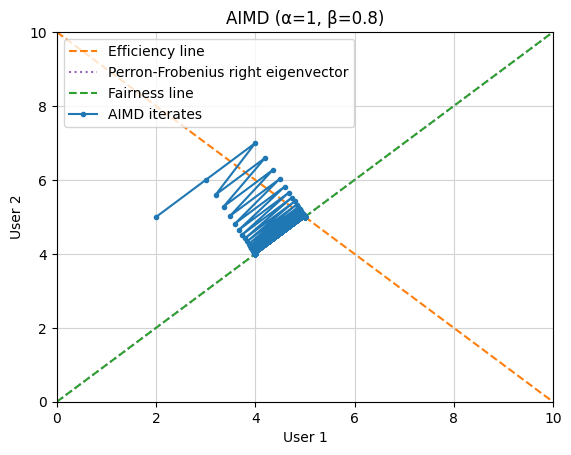

In [224]:
plt.plot(range(MAX_CAPACITY+1), range(MAX_CAPACITY,-1,-1), color='tab:orange', linestyle='--', label='Efficiency line')
plt.axline([0,0], pf_eigenvector, color='tab:purple', linestyle=':', label='Perron-Frobenius right eigenvector')
plt.plot(range(MAX_CAPACITY+1), range(MAX_CAPACITY+1), color='tab:green', linestyle='--', label='Fairness line')
plt.plot(cwnd1_values, cwnd2_values, marker='.', color='tab:blue', label='AIMD iterates')


plt.ylim([0,MAX_CAPACITY])
plt.xlim([0,MAX_CAPACITY])
plt.xlabel('User 1')
plt.ylabel('User 2')
plt.grid(color='lightgrey')
plt.legend()
plt.title(f'AIMD (α=1, β=0.8)')
plt.show()

# Uneven Linear AIMD (alpha_1=3, alpha_2=1, beta=0.5)

## Variable initialisations

In [225]:
# Number of AIMD iterations to simulate
MAX_ITERATIONS = 100

# Maximum capacity of the bottleneck shared by all users
MAX_CAPACITY = 10

# AIMD parameters for User 1
cwnd1 = 2
alpha1 = 3
beta1 = 0.5
increase_fn1 = add
decrease_fn1 = mul

# AIMD parameters for User 2
cwnd2 = 5
alpha2 = 1
beta2 = 0.5
increase_fn2 = add
decrease_fn2 = mul

# AIMD parameters for User 3
# cwnd3 = 3
# alpha3 = 1
# beta3 = 0.5
# increase_fn3 = add
# decrease_fn3 = mul

alphas = [alpha1, alpha2]
betas = [beta1, beta2]

# Store useful information at each iteration
step = []
cwnd1_values = np.zeros(MAX_ITERATIONS + 1)
cwnd2_values = np.zeros(MAX_ITERATIONS + 1)
# cwnd3_values = np.zeros(MAX_ITERATIONS + 1)

##  Perron-Frobenius right eigenvector of matrix A
<!-- ![title](MatrixA.png) -->
<img src="MatrixA.png" align="left" width=240 height=240 />

In [226]:
a = np.diag(betas) + \
(1/sum(alphas)) * \
np.array(alphas).reshape(-1,1) * \
np.array(list(map(lambda beta:1-beta, betas)))

In [227]:
eigenvalues, eigenvectors = np.linalg.eig(a)
pf_eigenvector = eigenvectors[:, np.argmax(eigenvalues)]
print(pf_eigenvector)

[0.9486833  0.31622777]


## AIMD iteration simulation

In [228]:
for i in range(MAX_ITERATIONS):
    cwnd1_values[i] = cwnd1
    cwnd2_values[i] = cwnd2
#     cwnd3_values[i] = cwnd3
    if (cwnd1 + cwnd2 <= MAX_CAPACITY):
        step.append('I')
        cwnd1 = increase_fn1(cwnd1, alpha=alpha1)
        cwnd2 = increase_fn2(cwnd2, alpha=alpha2)
#         cwnd3 = increase_fn3(cwnd3, alpha=alpha3)
    else:
        step.append('D')
        cwnd1 = decrease_fn1(cwnd1, beta=beta1)
        cwnd2 = decrease_fn2(cwnd2, beta=beta2)
#         cwnd3 = decrease_fn3(cwnd3, beta=beta3)
        
# Store values in arrays
cwnd1_values[-1] = cwnd1
cwnd2_values[-1] = cwnd2
# cwnd3_values[-1] = cwnd3
    
# Display the procedure taken in each iteration
print(f"{MAX_ITERATIONS} iterations completed:", step)

# Display the final values
print("Last 5 values of cwnd1:", cwnd1_values[-5:])
print("Last 5 values of cwnd2:", cwnd2_values[-5:])
# print("Last 5 values of cwnd3:", cwnd3_values[-5:])

100 iterations completed: ['I', 'D', 'I', 'I', 'D', 'I', 'D', 'I', 'I', 'D', 'I', 'D', 'I', 'I', 'D', 'I', 'D', 'I', 'I', 'D', 'I', 'D', 'I', 'I', 'D', 'I', 'D', 'I', 'I', 'D', 'I', 'D', 'I', 'I', 'D', 'I', 'D', 'I', 'I', 'D', 'I', 'D', 'I', 'I', 'D', 'I', 'D', 'I', 'I', 'D', 'I', 'D', 'I', 'I', 'D', 'I', 'D', 'I', 'I', 'D', 'I', 'D', 'I', 'I', 'D', 'I', 'D', 'I', 'I', 'D', 'I', 'D', 'I', 'I', 'D', 'I', 'D', 'I', 'I', 'D', 'I', 'D', 'I', 'I', 'D', 'I', 'D', 'I', 'I', 'D', 'I', 'D', 'I', 'I', 'D', 'I', 'D', 'I', 'I', 'D']
Last 5 values of cwnd1: [ 8.  4.  7. 10.  5.]
Last 5 values of cwnd2: [2.66666667 1.33333333 2.33333333 3.33333333 1.66666667]


## Data visualisation

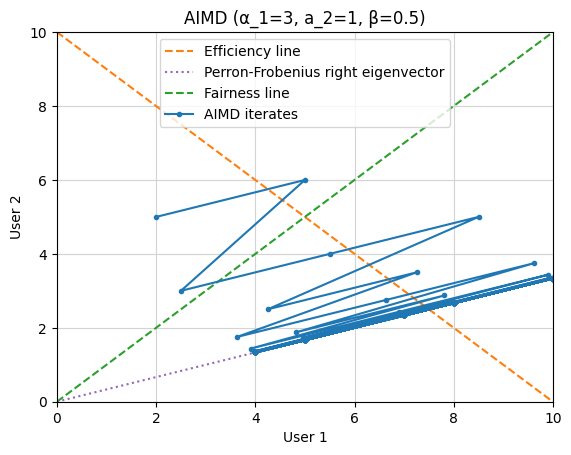

In [229]:
plt.plot(range(MAX_CAPACITY+1), range(MAX_CAPACITY,-1,-1), color='tab:orange', linestyle='--', label='Efficiency line')
plt.axline([0,0], pf_eigenvector, color='tab:purple', linestyle=':', label='Perron-Frobenius right eigenvector')
plt.plot(range(MAX_CAPACITY+1), range(MAX_CAPACITY+1), color='tab:green', linestyle='--', label='Fairness line')
plt.plot(cwnd1_values, cwnd2_values, marker='.', color='tab:blue', label='AIMD iterates')


plt.ylim([0,MAX_CAPACITY])
plt.xlim([0,MAX_CAPACITY])
plt.xlabel('User 1')
plt.ylabel('User 2')
plt.grid(color='lightgrey')
plt.legend()
plt.title(f'AIMD (α_1=3, a_2=1, β=0.5)')
plt.show()

# Uneven Linear AIMD (alpha=1, beta_1=0.8, beta_2=0.5)

## Variable initialisations

In [230]:
# Number of AIMD iterations to simulate
MAX_ITERATIONS = 100

# Maximum capacity of the bottleneck shared by all users
MAX_CAPACITY = 10

# AIMD parameters for User 1
cwnd1 = 2
alpha1 = 1
beta1 = 0.8
increase_fn1 = add
decrease_fn1 = mul

# AIMD parameters for User 2
cwnd2 = 5
alpha2 = 1
beta2 = 0.5
increase_fn2 = add
decrease_fn2 = mul

# AIMD parameters for User 3
# cwnd3 = 3
# alpha3 = 1
# beta3 = 0.5
# increase_fn3 = add
# decrease_fn3 = mul

alphas = [alpha1, alpha2]
betas = [beta1, beta2]

# Store useful information at each iteration
step = []
cwnd1_values = np.zeros(MAX_ITERATIONS + 1)
cwnd2_values = np.zeros(MAX_ITERATIONS + 1)
# cwnd3_values = np.zeros(MAX_ITERATIONS + 1)

##  Perron-Frobenius right eigenvector of matrix A
<!-- ![title](MatrixA.png) -->
<img src="MatrixA.png" align="left" width=240 height=240 />

In [231]:
a = np.diag(betas) + \
(1/sum(alphas)) * \
np.array(alphas).reshape(-1,1) * \
np.array(list(map(lambda beta:1-beta, betas)))

In [232]:
eigenvalues, eigenvectors = np.linalg.eig(a)
pf_eigenvector = eigenvectors[:, np.argmax(eigenvalues)]
print(pf_eigenvector)

[0.92847669 0.37139068]


## AIMD iteration simulation

In [233]:
for i in range(MAX_ITERATIONS):
    cwnd1_values[i] = cwnd1
    cwnd2_values[i] = cwnd2
#     cwnd3_values[i] = cwnd3
    if (cwnd1 + cwnd2 <= MAX_CAPACITY):
        step.append('I')
        cwnd1 = increase_fn1(cwnd1, alpha=alpha1)
        cwnd2 = increase_fn2(cwnd2, alpha=alpha2)
#         cwnd3 = increase_fn3(cwnd3, alpha=alpha3)
    else:
        step.append('D')
        cwnd1 = decrease_fn1(cwnd1, beta=beta1)
        cwnd2 = decrease_fn2(cwnd2, beta=beta2)
#         cwnd3 = decrease_fn3(cwnd3, beta=beta3)
        
# Store values in arrays
cwnd1_values[-1] = cwnd1
cwnd2_values[-1] = cwnd2
# cwnd3_values[-1] = cwnd3
    
# Display the procedure taken in each iteration
print(f"{MAX_ITERATIONS} iterations completed:", step)

# Display the final values
print("Last 5 values of cwnd1:", cwnd1_values[-5:])
print("Last 5 values of cwnd2:", cwnd2_values[-5:])
# print("Last 5 values of cwnd3:", cwnd3_values[-5:])

100 iterations completed: ['I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'D', 'I', 'I', 'D', 'I', 'D', 'I', 'I', 'D', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'D', 'I', 'I', 'D', 'I', 'D', 'I', 'I', 'D', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'D', 'I', 'I', 'D', 'I', 'D', 'I', 'I', 'D', 'I', 'D', 'I', 'I', 'D', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'D', 'I', 'I', 'D', 'I', 'D', 'I', 'I', 'D', 'I', 'D', 'I', 'I', 'D', 'I', 'D', 'I']
Last 5 values of cwnd1: [7.9137044  6.33096352 7.33096352 5.86477082 6.86477082]
Last 5 values of cwnd2: [3.33855192 1.66927596 2.66927596 1.33463798 2.33463798]


## Data visualisation

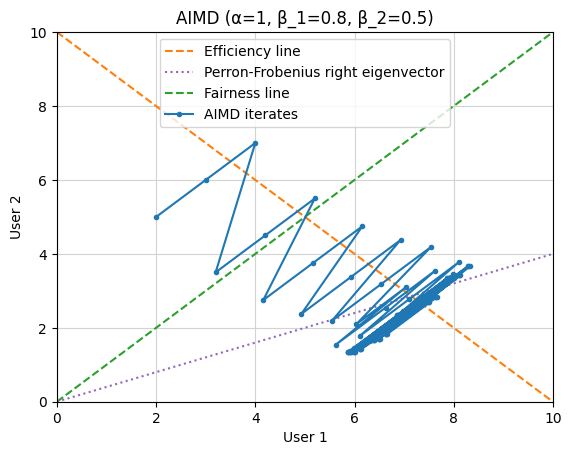

In [234]:
plt.plot(range(MAX_CAPACITY+1), range(MAX_CAPACITY,-1,-1), color='tab:orange', linestyle='--', label='Efficiency line')
plt.axline([0,0], pf_eigenvector, color='tab:purple', linestyle=':', label='Perron-Frobenius right eigenvector')
plt.plot(range(MAX_CAPACITY+1), range(MAX_CAPACITY+1), color='tab:green', linestyle='--', label='Fairness line')
plt.plot(cwnd1_values, cwnd2_values, marker='.', color='tab:blue', label='AIMD iterates')


plt.ylim([0,MAX_CAPACITY])
plt.xlim([0,MAX_CAPACITY])
plt.xlabel('User 1')
plt.ylabel('User 2')
plt.grid(color='lightgrey')
plt.legend()
plt.title(f'AIMD (α=1, β_1=0.8, β_2=0.5)')
plt.show()

# Exponential AIMD

## Variable initialisations

In [235]:
# Number of AIMD iterations to simulate
MAX_ITERATIONS = 100

# Maximum capacity of the bottleneck shared by all users
MAX_CAPACITY = 20

# AIMD parameters for User 1
cwnd1 = 2
alpha1 = 0.1
beta1 = 0.5
increase_fn1 = exp
decrease_fn1 = mul

# AIMD parameters for User 2
cwnd2 = 5
alpha2 = 1
beta2 = 0.5
increase_fn2 = add
decrease_fn2 = mul

# AIMD parameters for User 3
# cwnd3 = 3
# alpha3 = 1
# beta3 = 0.5
# increase_fn3 = add
# decrease_fn3 = mul

alphas = [alpha1, alpha2]
betas = [beta1, beta2]

# Store useful information at each iteration
step = []
cwnd1_values = np.zeros(MAX_ITERATIONS + 1)
cwnd2_values = np.zeros(MAX_ITERATIONS + 1)
# cwnd3_values = np.zeros(MAX_ITERATIONS + 1)

## AIMD iteration simulation

In [236]:
for i in range(MAX_ITERATIONS):
    cwnd1_values[i] = cwnd1
    cwnd2_values[i] = cwnd2
#     cwnd3_values[i] = cwnd3
    if (cwnd1 + cwnd2 <= MAX_CAPACITY):
        step.append('I')
        cwnd1 = increase_fn1(cwnd1, alpha=alpha1)
        cwnd2 = increase_fn2(cwnd2, alpha=alpha2)
#         cwnd3 = increase_fn3(cwnd3, alpha=alpha3)
    else:
        step.append('D')
        cwnd1 = decrease_fn1(cwnd1, beta=beta1)
        cwnd2 = decrease_fn2(cwnd2, beta=beta2)
#         cwnd3 = decrease_fn3(cwnd3, beta=beta3)
        
# Store values in arrays
cwnd1_values[-1] = cwnd1
cwnd2_values[-1] = cwnd2
# cwnd3_values[-1] = cwnd3
    
# Display the procedure taken in each iteration
print(f"{MAX_ITERATIONS} iterations completed:", step)

# Display the final values
print("Last 5 values of cwnd1:", cwnd1_values[-5:])
print("Last 5 values of cwnd2:", cwnd2_values[-5:])
# print("Last 5 values of cwnd3:", cwnd3_values[-5:])

100 iterations completed: ['I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'I']
Last 5 values of cwnd1: [17.82488281  8.9124414  11.57313602 15.5102373  21.61864004]
Last 5 values of cwnd2: [4.66130131 2.33065066 3.33065066 4.33065066 5.33065066]


## Data visualisation

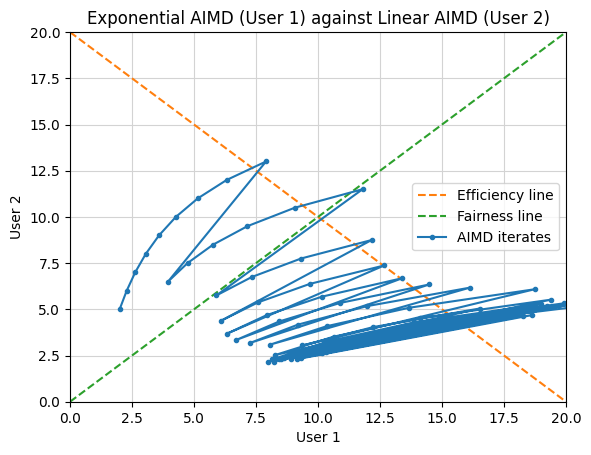

In [237]:
plt.plot(range(MAX_CAPACITY+1), range(MAX_CAPACITY,-1,-1), color='tab:orange', linestyle='--', label='Efficiency line')
plt.plot(range(MAX_CAPACITY+1), range(MAX_CAPACITY+1), color='tab:green', linestyle='--', label='Fairness line')
plt.plot(cwnd1_values, cwnd2_values, marker='.', color='tab:blue', label='AIMD iterates')


plt.ylim([0,MAX_CAPACITY])
plt.xlim([0,MAX_CAPACITY])
plt.xlabel('User 1')
plt.ylabel('User 2')
plt.grid(color='lightgrey')
plt.legend()
plt.title(f'Exponential AIMD (User 1) against Linear AIMD (User 2)')
plt.show()

# Inverse AIMD

## Variable initialisations

In [238]:
# Number of AIMD iterations to simulate
MAX_ITERATIONS = 100

# Maximum capacity of the bottleneck shared by all users
MAX_CAPACITY = 20

# AIMD parameters for User 1
cwnd1 = 2
alpha1 = 1
beta1 = 0.5
increase_fn1 = inverse
decrease_fn1 = mul

# AIMD parameters for User 2
cwnd2 = 5
alpha2 = 1
beta2 = 0.5
increase_fn2 = add
decrease_fn2 = mul

# AIMD parameters for User 3
# cwnd3 = 3
# alpha3 = 1
# beta3 = 0.5
# increase_fn3 = add
# decrease_fn3 = mul

alphas = [alpha1, alpha2]
betas = [beta1, beta2]

# Store useful information at each iteration
step = []
cwnd1_values = np.zeros(MAX_ITERATIONS + 1)
cwnd2_values = np.zeros(MAX_ITERATIONS + 1)
# cwnd3_values = np.zeros(MAX_ITERATIONS + 1)

## AIMD iteration simulation

In [239]:
for i in range(MAX_ITERATIONS):
    cwnd1_values[i] = cwnd1
    cwnd2_values[i] = cwnd2
#     cwnd3_values[i] = cwnd3
    if (cwnd1 + cwnd2 <= MAX_CAPACITY):
        step.append('I')
        cwnd1 = increase_fn1(cwnd1, alpha=alpha1)
        cwnd2 = increase_fn2(cwnd2, alpha=alpha2)
#         cwnd3 = increase_fn3(cwnd3, alpha=alpha3)
    else:
        step.append('D')
        cwnd1 = decrease_fn1(cwnd1, beta=beta1)
        cwnd2 = decrease_fn2(cwnd2, beta=beta2)
#         cwnd3 = decrease_fn3(cwnd3, beta=beta3)
        
# Store values in arrays
cwnd1_values[-1] = cwnd1
cwnd2_values[-1] = cwnd2
# cwnd3_values[-1] = cwnd3
    
# Display the procedure taken in each iteration
print(f"{MAX_ITERATIONS} iterations completed:", step)

# Display the final values
print("Last 5 values of cwnd1:", cwnd1_values[-5:])
print("Last 5 values of cwnd2:", cwnd2_values[-5:])
# print("Last 5 values of cwnd3:", cwnd3_values[-5:])

100 iterations completed: ['I', 'I', 'I', 'D', 'I', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'I', 'D', 'I', 'I']
Last 5 values of cwnd1: [13.0818662  14.5021325   7.25106625  9.6749954  11.54853251]
Last 5 values of cwnd2: [6.71456528 7.71456528 3.85728264 4.85728264 5.85728264]


## Data visualisation

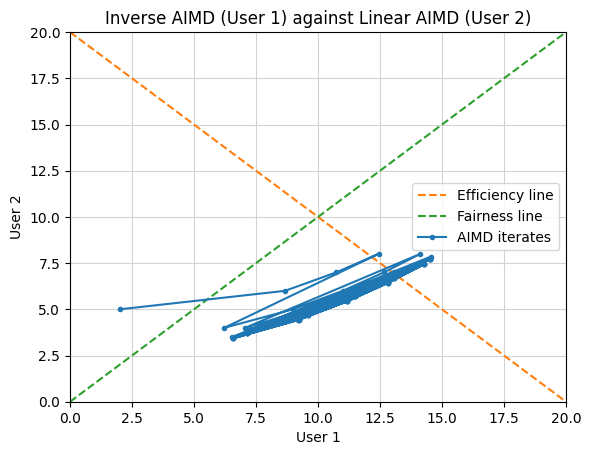

In [241]:
plt.plot(range(MAX_CAPACITY+1), range(MAX_CAPACITY,-1,-1), color='tab:orange', linestyle='--', label='Efficiency line')
plt.plot(range(MAX_CAPACITY+1), range(MAX_CAPACITY+1), color='tab:green', linestyle='--', label='Fairness line')
plt.plot(cwnd1_values, cwnd2_values, marker='.', color='tab:blue', label='AIMD iterates')


plt.ylim([0,MAX_CAPACITY])
plt.xlim([0,MAX_CAPACITY])
plt.xlabel('User 1')
plt.ylabel('User 2')
plt.grid(color='lightgrey')
plt.legend()
plt.title(f'Inverse AIMD (User 1) against Linear AIMD (User 2)')
plt.show()

# Logarithmic AIMD

## Variable initialisations

In [242]:
# Number of AIMD iterations to simulate
MAX_ITERATIONS = 100

# Maximum capacity of the bottleneck shared by all users
MAX_CAPACITY = 20

# AIMD parameters for User 1
cwnd1 = 2
alpha1 = 1
beta1 = 0.5
increase_fn1 = log
decrease_fn1 = mul

# AIMD parameters for User 2
cwnd2 = 5
alpha2 = 1
beta2 = 0.5
increase_fn2 = add
decrease_fn2 = mul

# AIMD parameters for User 3
# cwnd3 = 3
# alpha3 = 1
# beta3 = 0.5
# increase_fn3 = add
# decrease_fn3 = mul

alphas = [alpha1, alpha2]
betas = [beta1, beta2]

# Store useful information at each iteration
step = []
cwnd1_values = np.zeros(MAX_ITERATIONS + 1)
cwnd2_values = np.zeros(MAX_ITERATIONS + 1)
# cwnd3_values = np.zeros(MAX_ITERATIONS + 1)

## AIMD iteration simulation

In [243]:
for i in range(MAX_ITERATIONS):
    cwnd1_values[i] = cwnd1
    cwnd2_values[i] = cwnd2
#     cwnd3_values[i] = cwnd3
    if (cwnd1 + cwnd2 <= MAX_CAPACITY):
        step.append('I')
        cwnd1 = increase_fn1(cwnd1, alpha=alpha1)
        cwnd2 = increase_fn2(cwnd2, alpha=alpha2)
#         cwnd3 = increase_fn3(cwnd3, alpha=alpha3)
    else:
        step.append('D')
        cwnd1 = decrease_fn1(cwnd1, beta=beta1)
        cwnd2 = decrease_fn2(cwnd2, beta=beta2)
#         cwnd3 = decrease_fn3(cwnd3, beta=beta3)
        
# Store values in arrays
cwnd1_values[-1] = cwnd1
cwnd2_values[-1] = cwnd2
# cwnd3_values[-1] = cwnd3
    
# Display the procedure taken in each iteration
print(f"{MAX_ITERATIONS} iterations completed:", step)

# Display the final values
print("Last 5 values of cwnd1:", cwnd1_values[-5:])
print("Last 5 values of cwnd2:", cwnd2_values[-5:])
# print("Last 5 values of cwnd3:", cwnd3_values[-5:])

100 iterations completed: ['I', 'I', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'D', 'I', 'I']
Last 5 values of cwnd1: [11.56756069 14.09867963  7.04933982  9.13492989 11.45091776]
Last 5 values of cwnd2: [5.03174734 6.03174734 3.01587367 4.01587367 5.01587367]


## Data visualisation

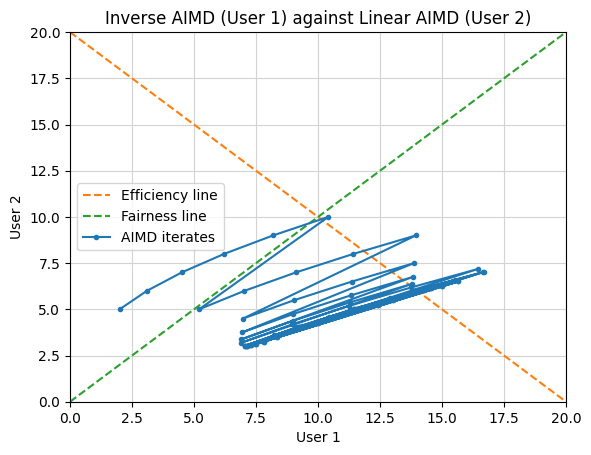

In [244]:
plt.plot(range(MAX_CAPACITY+1), range(MAX_CAPACITY,-1,-1), color='tab:orange', linestyle='--', label='Efficiency line')
plt.plot(range(MAX_CAPACITY+1), range(MAX_CAPACITY+1), color='tab:green', linestyle='--', label='Fairness line')
plt.plot(cwnd1_values, cwnd2_values, marker='.', color='tab:blue', label='AIMD iterates')


plt.ylim([0,MAX_CAPACITY])
plt.xlim([0,MAX_CAPACITY])
plt.xlabel('User 1')
plt.ylabel('User 2')
plt.grid(color='lightgrey')
plt.legend()
plt.title(f'Inverse AIMD (User 1) against Linear AIMD (User 2)')
plt.show()

# Multiple users AIMD

## Variable initialisations

In [313]:
# Number of AIMD iterations to simulate
MAX_ITERATIONS = 100

# Maximum capacity of the bottleneck shared by all users
MAX_CAPACITY = 20

cwnds =  [1, 2, 3, 4, 5]
alphas = [1, 1, 2, 1, 1.5]
betas =  [0.5, 0.5, 0.5, 0.5, 0.5]
increase_fns = [add, add, add, inverse, log]
decrease_fns = [mul, mul, mul, mul, mul]

## AIMD iteration simulation

In [314]:
cwnd_values = [cwnds.copy()]

for i in range(MAX_ITERATIONS):
    if (sum(cwnds) <= MAX_CAPACITY):
        step.append('I')
        for j in range(len(cwnds)):
            cwnds[j] = increase_fns[j](cwnds[j], alpha=alphas[j])
    else:
        step.append('D')
        for j in range(len(cwnds)):
            cwnds[j] = decrease_fns[j](cwnds[j], beta=betas[j])
        
    # Store values in arrays
    cwnd_values.append(cwnds.copy())
    
# Display the procedure taken in each iteration
print(f"{MAX_ITERATIONS} iterations completed:", step)

# Display the final values
print("Last 5 values of cwnd:", cwnd_values[-5:])

100 iterations completed: ['I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I'

## Data visualisation

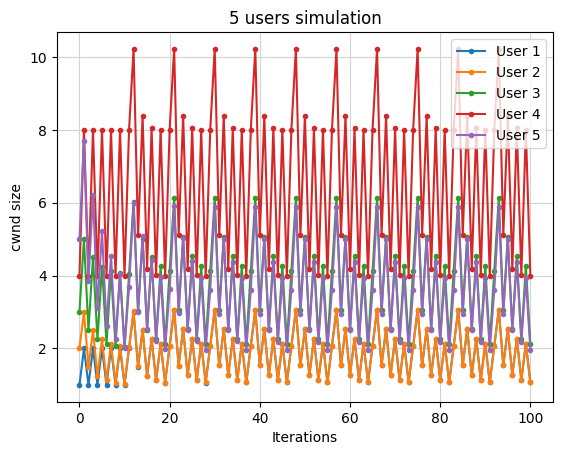

In [317]:
indiv_cwnd_values = [list(x) for x in zip(*cwnd_values)]
    
x = range(MAX_ITERATIONS+1)

for ind,y in enumerate(indiv_cwnd_values):
    plt.plot(x, y, '-', marker='.', label=f'User {ind+1}')
    
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('cwnd size')
plt.grid(color='lightgrey')
plt.legend()
plt.title(f'{len(cwnds)} users simulation')
plt.show()